In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes

In [2]:
df = pd.read_csv("segmentation_data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
df.tail()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [4]:
df.isnull().sum() # null verimiz var mı ?

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [5]:
df_temp = df[["ID","Age","Income"]]
df_temp

,ID,Age,Income
0,100000001,67,124670
1,100000002,22,150773
2,100000003,49,89210
3,100000004,45,171565
4,100000005,53,149031
...,...,...,...
1995,100001996,47,123525
1996,100001997,27,117744
1997,100001998,31,86400
1998,100001999,24,97968


In [6]:
scaler = MinMaxScaler()
scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])

scaler.fit(df[["Income"]])
df["Income"] = scaler.transform(df[["Income"]])

In [7]:
# id sütunu kullanılmayacağından onu düşürelim
df = df.drop(["ID"], axis = 1)

In [9]:
mark_array = df.values

#age ve income sütunlarını float'a çevirelim çünkü kmodes modelinde float istiyor
mark_array[:, 2] = mark_array[:, 2].astype(float)
mark_array[:, 4] = mark_array[:, 4].astype(float)

In [10]:
kproto = KPrototypes(n_clusters=10, verbose = 2, max_iter = 20)
clusters = kproto.fit_predict(mark_array, categorical = [0,1,3,5,6])

print(kproto.cluster_centroids_)
len(kproto.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 779, ncost: 185.64632923936068
Run: 1, iteration: 2/20, moves: 153, ncost: 181.14334736682784
Run: 1, iteration: 3/20, moves: 98, ncost: 180.5406311714905
Run: 1, iteration: 4/20, moves: 33, ncost: 180.43022209706882
Run: 1, iteration: 5/20, moves: 15, ncost: 180.3966617260354
Run: 1, iteration: 6/20, moves: 8, ncost: 180.3888210900309
Run: 1, iteration: 7/20, moves: 0, ncost: 180.3888210900309
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 789, ncost: 168.11259698709586
Run: 2, iteration: 2/20, moves: 156, ncost: 162.71756102507828
Run: 2, iteration: 3/20, moves: 45, ncost: 162.56844959678276
Run: 2, iteration: 4/20, moves: 8, ncost: 162.55215405995415
Run: 2, iteration: 5/20, moves: 4, ncost: 162.54824288889927
Run: 2, iteration: 6/20,

10

In [11]:
cluster_dict = []

for c in clusters:
    cluster_dict.append(c)
    
df["cluster"] = cluster_dict

#orijinal sütunları geçici df'den geri alalım
df[["ID","Age","Income"]] = df_temp

In [16]:
df[df["cluster"] == 9].head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
10,1,1,25,1,108469,1,0,9,100000011
11,1,1,24,1,127596,1,0,9,100000012
12,1,1,22,1,108687,1,2,9,100000013
41,0,1,26,1,130921,1,0,9,100000042
49,1,1,28,1,122831,1,0,9,100000050
66,1,1,29,1,111069,1,0,9,100000067
67,0,1,22,1,139780,1,0,9,100000068
69,1,1,25,1,110019,1,2,9,100000070
86,1,1,27,1,110064,1,2,9,100000087
108,1,1,30,1,165147,1,0,9,100000109


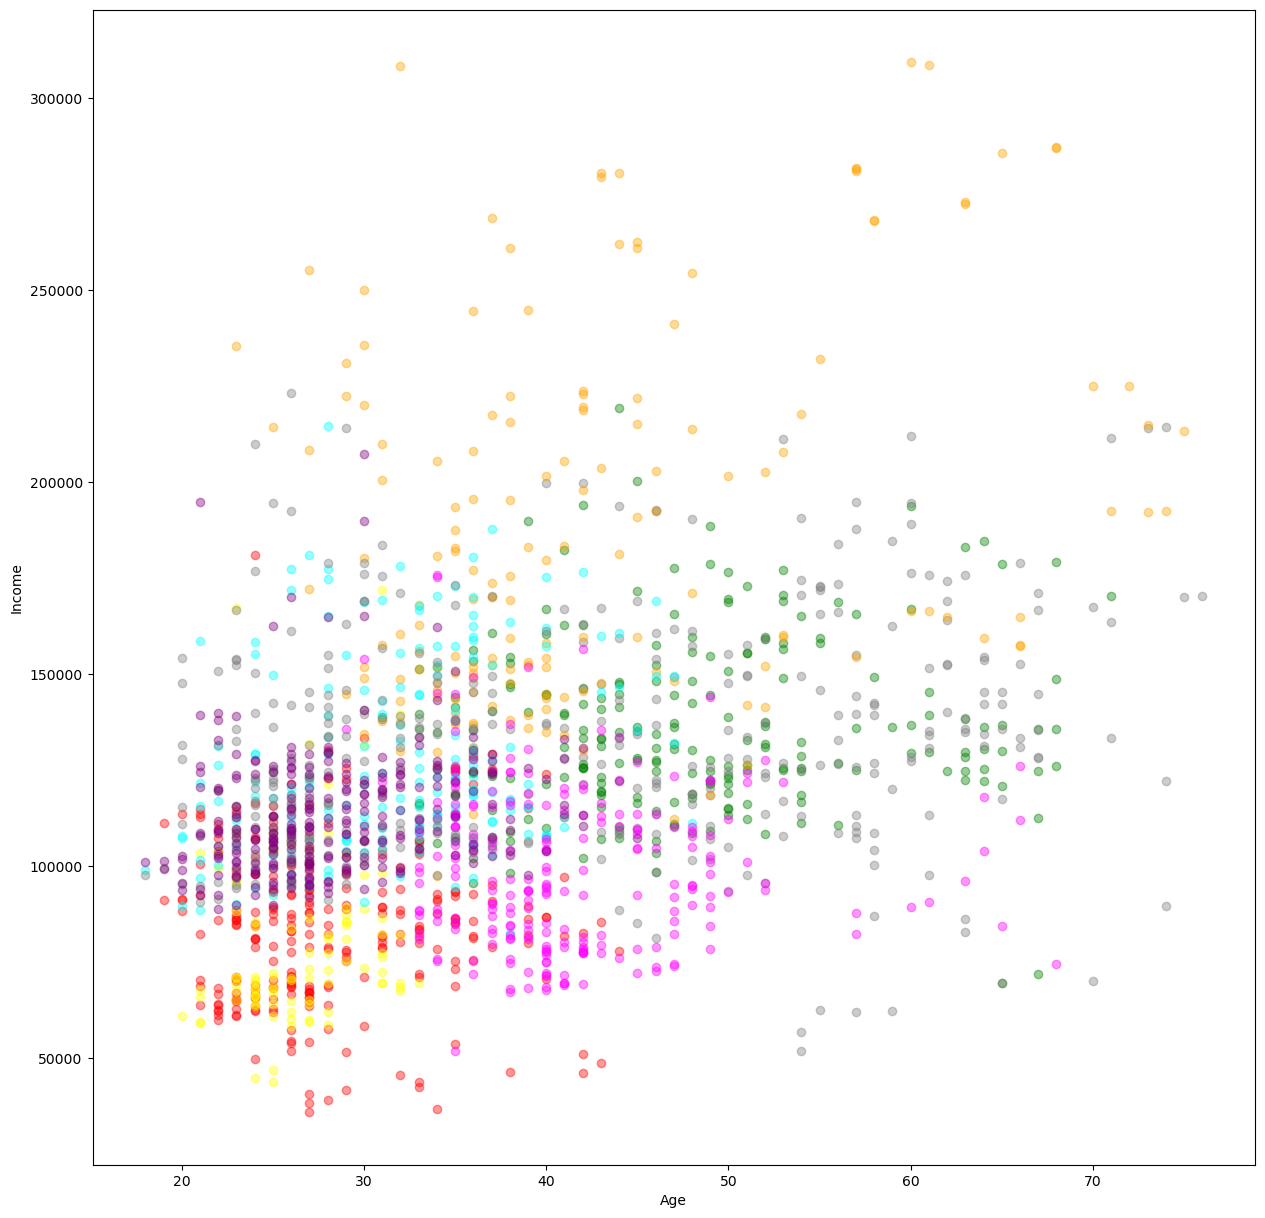

In [19]:


df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==6]
df7 = df[df.cluster==7]
df8 = df[df.cluster==8]
df9 = df[df.cluster==9]
df10 = df[df.cluster==10]


plt.figure(figsize=(15,15))
plt.xlabel('Age')
plt.ylabel('Income')

plt.scatter(df1.Age, df1['Income'],color='green', alpha = 0.4)
plt.scatter(df2.Age, df2['Income'],color='red', alpha = 0.4)
plt.scatter(df3.Age, df3['Income'],color='gray', alpha = 0.4)
plt.scatter(df4.Age, df4['Income'],color='orange', alpha = 0.4)
plt.scatter(df5.Age, df5['Income'],color='yellow', alpha = 0.4)
plt.scatter(df6.Age, df6['Income'],color='cyan', alpha = 0.4)
plt.scatter(df7.Age, df7['Income'],color='magenta', alpha = 0.4)
plt.scatter(df8.Age, df8['Income'],color='gray', alpha = 0.4)
plt.scatter(df9.Age, df9['Income'],color='purple', alpha = 0.4)
plt.scatter(df10.Age, df10['Income'],color='blue', alpha = 0.4)

plt.show()
